<a href="https://colab.research.google.com/github/singh-krishan/Python-for-Data-Analysis-2nd-Edition-wes-McKinney/blob/master/Hands_on_ML_ch08_dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.model_selection import train_test_split,cross_val_score
import numpy as np
import matplotlib.pyplot as plt


In [6]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
X.shape, y.shape

((70000, 784), (70000,))

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 5)
X2D = pca.fit_transform(X)

In [ ]:
X2D.shape

(70000, 2)

In [ ]:
pca.components_.T.shape

(784, 2)

In [ ]:
pca.explained_variance_ratio_

array([0.09746116, 0.07155445, 0.06149531, 0.05403384, 0.04888934])

In [ ]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

In [ ]:
pca.explained_variance_ratio_.shape


(154,)

In [ ]:
import numpy as np

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [ ]:
d

154

NameError: ignored

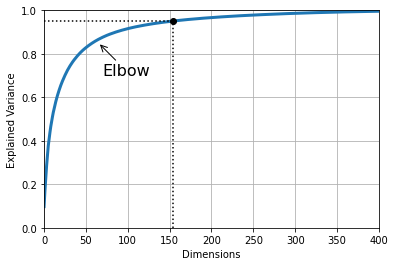

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
save_fig("explained_variance_plot")
plt.show()

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA

In [3]:
clf = Pipeline([
                ("kpca", KernelPCA(n_components=2)),
                ("log_reg", LogisticRegression())
])

In [8]:
param_grid = [{
               "kpca__gamma":np.linspace(0.03, 0.05, 10),
               "kpca__kernel":["rbf", "sigmoid"]
               }]


In [1]:
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X,y)

NameError: ignored